In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [2]:
dataDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/ccl4_6wk'
workingDirectory = '/home/h1bennet/strains/results/200922_Strains_CCl4_6weeks_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [3]:
qc = ngs_qc(dataDirectory, 'atac')

/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/ccl4_6wk/
./ccl4_6wk_qc/


<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
00_NCoRWT_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_LN156D_JSS_TDT_2016_06_06,12094765.0,68.0,0.005034,1.135,-1.0,19047527.0,13153409.0,5360539.0,533579.0,0.690557,0.971987
00_NCoRWT_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_LN159A_JSS_TDT_2016_06_06,13370969.0,70.0,0.005981,1.219,-1.0,22655858.0,15754240.0,6356674.0,544944.0,0.695372,0.975947
01_balbc_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_Balb10_TDT_JSS_2016_05_31,11245709.0,68.0,0.007123,1.724,-1.0,25268691.0,17231120.0,7274034.0,763537.0,0.681916,0.969783
01_balbc_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_Balb7_TDT_JSS_2016_05_31,11741101.0,67.0,0.007906,1.833,-1.0,30946603.0,19893078.0,9520862.0,1532663.0,0.642819,0.950474
01_balbc_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_Balb9_TDT_JSS_2016_05_31,10098760.0,67.0,0.006355,1.713,-1.0,23286604.0,15352629.0,7248076.0,685899.0,0.659290,0.970545
02_aj_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_AJ11_TDT_JSS_2016_05_31,6359593.0,79.0,0.003818,1.634,-1.0,13669049.0,8931057.0,4417259.0,320733.0,0.653378,0.976536
02_aj_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_AJ12_TDT_JSS_2016_05_31,11199434.0,67.0,0.008393,2.040,-1.0,29383959.0,20303118.0,8251107.0,829734.0,0.690959,0.971762
02_aj_Kupffer_ATAC_CCl4_6wk_noRecovery_flavopiridol_AJ8_TDT_JSS_2016_05_31,11377935.0,77.0,0.007766,1.858,-1.0,27914818.0,18081987.0,9220058.0,612773.0,0.647756,0.978048


### Plot tag count distribution

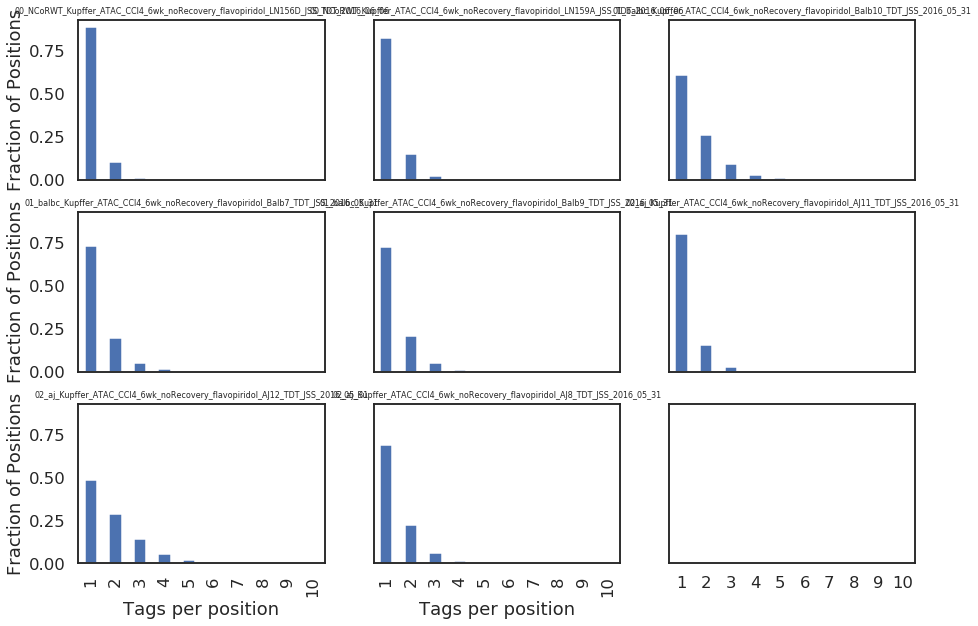

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|



In [6]:
makeMultiWigHub.pl hrb_strains_atac_ccl4_6wks mm10 -force -color \
77,175,74 77,175,74 \
55,126,184 55,126,184 55,126,184 \
228,26,28 228,26,28 228,26,28 \
-d /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/ccl4_6wk/*

SyntaxError: invalid syntax (<ipython-input-6-2a8ec57607b8>, line 1)

# Call Peaks

In [7]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [8]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [9]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [10]:
df.sort_index(inplace=True)

### Save to file

In [11]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')

In [12]:
df.loc[df.index.str.contains('default'), :]

""
